In [1]:
# Import the Utility Functions
import pandas as pd
import numpy as np
import mls_utils as utils
import matplotlib.pyplot as plt


df = pd.read_csv("Clean_Data/mls_condo_cleaned_3.csv")
df.head()

,Mortgage Rates,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,...,Lon,Cluster,List Year,List Month,Closing Year,Closing Month,Price Increase Percentage,Age of Property,Geo Cluster,Log Sold Price
0,2.65,27244,3,2,-0.092284,-0.110336,1986,2020-12-17,2021-01-07,-0.833182,...,-79.5067,0,2020,12,2021,1,1.485208,0.257652,3,12.193499
1,2.65,27601,2,2,0.130379,-0.110336,2018,2018-07-09,2021-01-08,1.909754,...,-78.6324,1,2018,7,2021,1,0.162524,-1.240238,0,13.283977
2,2.65,27601,2,2,0.130379,-0.110336,2018,2018-02-01,2021-01-08,1.628872,...,-78.6324,1,2018,2,2021,1,0.071551,-1.240238,0,13.205871
3,2.65,27511,2,2,1.125817,-0.110336,2019,2018-02-25,2021-01-05,1.039366,...,-78.7786,1,2018,2,2021,1,0.021896,-1.287047,0,13.030040
4,2.65,27609,2,2,-0.679069,-0.110336,1972,2020-12-02,2021-01-07,-1.249304,...,-78.6317,3,2020,12,2021,1,0.547584,0.912979,4,11.737676


In [2]:
#Covert the Nan values in Log Sold Price to 0
df['Log Sold Price'] = df['Log Sold Price'].fillna(0)

In [4]:
#Select features and target variables
features = ['Mortgage Rates', 'Bedrooms', 'Total Baths', 'SqFt', 'Acres', 'Year Built', 'Days on Market', 'Over Asking', 'Lat', 'List Year', 'Closing Year',
       'Closing Month', 'Price Increase Percentage', 'Geo Cluster'] 
target = 'Sold Price'

In [5]:
# Split the data
X_train, X_test, y_train, y_test = utils.split_data(df, features, target)

# Scale the data
X_train_scaled, X_test_scaled = utils.scale_data(X_train, X_test)

In [6]:
# Feature selection
selected_features = utils.select_features(X_train_scaled, y_train)
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

In [7]:
# Ridge Regression
ridge_model = utils.tune_hyperparameters(X_train_selected, y_train, 'ridge')
ridge_train_mse, ridge_test_mse, ridge_train_r2, ridge_test_r2 = utils.evaluate_model(ridge_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Ridge Regression - Train MSE: {ridge_train_mse}')
print(f'Ridge Regression - Test MSE: {ridge_test_mse}')
print(f'Ridge Regression - Train R2: {ridge_train_r2}')
print(f'Ridge Regression - Test R2: {ridge_test_r2}')

Ridge Regression - Train MSE: 8847703989.124115
Ridge Regression - Test MSE: 8883312905.283268
Ridge Regression - Train R2: 0.5712120742345141
Ridge Regression - Test R2: 0.546495311923193


In [8]:
# Lasso Regression
lasso_model = utils.tune_hyperparameters(X_train_selected, y_train, 'lasso')
lasso_train_mse, lasso_test_mse, lasso_train_r2, lasso_test_r2 = utils.evaluate_model(lasso_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Lasso Regression - Train MSE: {lasso_train_mse}')
print(f'Lasso Regression - Test MSE: {lasso_test_mse}')
print(f'Lasso Regression - Train R2: {lasso_train_r2}')
print(f'Lasso Regression - Test R2: {lasso_test_r2}')


Lasso Regression - Train MSE: 8847695469.915285
Lasso Regression - Test MSE: 8882808174.182005
Lasso Regression - Train R2: 0.5712124871025179
Lasso Regression - Test R2: 0.5465210791029695


In [9]:
# Decision Tree Regressor
dt_model = utils.tune_hyperparameters(X_train_selected, y_train, 'decision_tree')
dt_train_mse, dt_test_mse, dt_train_r2, dt_test_r2 = utils.evaluate_model(dt_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Decision Tree Regressor - Train MSE: {dt_train_mse}')
print(f'Decision Tree Regressor - Test MSE: {dt_test_mse}')
print(f'Decision Tree Regressor - Train R2: {dt_train_r2}')
print(f'Decision Tree Regressor - Test R2: {dt_test_r2}')

Decision Tree Regressor - Train MSE: 845284028.98462
Decision Tree Regressor - Test MSE: 5167862287.913009
Decision Tree Regressor - Train R2: 0.9590348427211692
Decision Tree Regressor - Test R2: 0.7361739026990686


In [10]:
# Random Forest Regressor
rf_model = utils.tune_hyperparameters(X_train_selected, y_train, 'random_forest')
rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2 = utils.evaluate_model(rf_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Random Forest Regressor - Train MSE: {rf_train_mse}')
print(f'Random Forest Regressor - Test MSE: {rf_test_mse}')
print(f'Random Forest Regressor - Train R2: {rf_train_r2}')
print(f'Random Forest Regressor - Test R2: {rf_test_r2}')

Random Forest Regressor - Train MSE: 336099420.82679
Random Forest Regressor - Test MSE: 2220961385.8325725
Random Forest Regressor - Train R2: 0.9837115511906307
Random Forest Regressor - Test R2: 0.8866170300143766


In [11]:
# Support Vector Regressor
svr_model = utils.tune_hyperparameters(X_train_selected, y_train, 'svm')
svr_train_mse, svr_test_mse, svr_train_r2, svr_test_r2 = utils.evaluate_model(svr_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Support Vector Regressor - Train MSE: {svr_train_mse}')
print(f'Support Vector Regressor - Test MSE: {svr_test_mse}')
print(f'Support Vector Regressor - Train R2: {svr_train_r2}')
print(f'Support Vector Regressor - Test R2: {svr_test_r2}')


Support Vector Regressor - Train MSE: 21727047542.14199
Support Vector Regressor - Test MSE: 20318725634.994
Support Vector Regressor - Train R2: -0.05296195036080009
Support Vector Regressor - Test R2: -0.037297394504234305


In [12]:
# K-Nearest Neighbors Regressor
knn_model = utils.tune_hyperparameters(X_train_selected, y_train, 'knn')
knn_train_mse, knn_test_mse, knn_train_r2, knn_test_r2 = utils.evaluate_model(knn_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'K-Nearest Neighbors Regressor - Train MSE: {knn_train_mse}')
print(f'K-Nearest Neighbors Regressor - Test MSE: {knn_test_mse}')
print(f'K-Nearest Neighbors Regressor - Train R2: {knn_train_r2}')
print(f'K-Nearest Neighbors Regressor - Test R2: {knn_test_r2}')


K-Nearest Neighbors Regressor - Train MSE: 4251318038.8306966
K-Nearest Neighbors Regressor - Test MSE: 5439773970.6723175
K-Nearest Neighbors Regressor - Train R2: 0.7939675823377011
K-Nearest Neighbors Regressor - Test R2: 0.7222924573206377


Bar Charts for Error Metrics

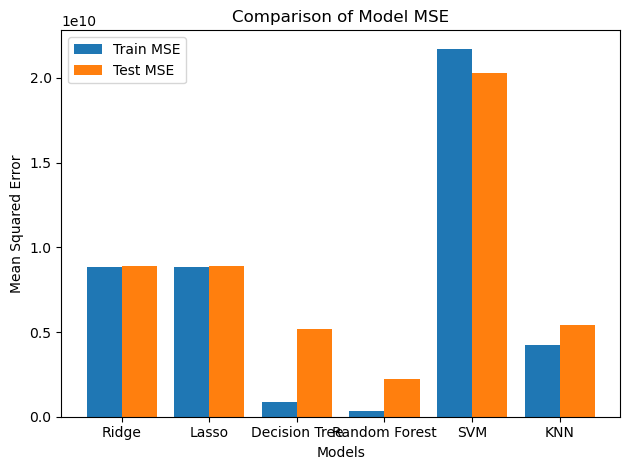

In [13]:
# Data
models = ['Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
train_mse = [ridge_train_mse, lasso_train_mse, dt_train_mse, rf_train_mse, svr_train_mse, knn_train_mse]
test_mse = [ridge_test_mse, lasso_test_mse, dt_test_mse, rf_test_mse, svr_test_mse, knn_test_mse]

x = range(len(models))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_mse, width=0.4, label='Train MSE')
rects2 = ax.bar([p + 0.4 for p in x], test_mse, width=0.4, label='Test MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of Model MSE')
ax.set_xticks([p + 0.2 for p in x])
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

Scatter Plots for Predictions vs. Actuals


In [20]:
'''
plt.figure(figsize=(10, 6))
print(y_test.shape)
print(rf_test_mse.shape)
plt.scatter(y_test, X_test_selected, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # A reference line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
'''

"\nplt.figure(figsize=(10, 6))\nprint(y_test.shape)\nprint(rf_test_mse.shape)\nplt.scatter(y_test, X_test_selected, alpha=0.5)\nplt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # A reference line\nplt.title('Actual vs. Predicted Values')\nplt.xlabel('Actual Values')\nplt.ylabel('Predicted Values')\nplt.grid(True)\nplt.show()\n"